In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(2)

In [64]:
df = pd.read_csv('creditcard.csv')

In [65]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
from sklearn.preprocessing import StandardScaler
df['normalizedamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

In [67]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [68]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedamount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [69]:
df = df.drop(['Time'],axis=1)

In [70]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedamount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [71]:
#x = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

In [72]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y, test_size = 0.3, random_state=0)

In [74]:
x_train.shape

(199364, 2)

In [75]:
y_train.shape

(199364, 1)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
random_forest = RandomForestClassifier(n_estimators=100)

In [78]:
random_forest.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [79]:
y_pred = random_forest.predict(x_test)

In [80]:
random_forest.score(x_test,y_test)

0.9983965918799668

In [81]:
result = random_forest.score(x_test,y_test)

In [82]:
cnf_matrix = confusion_matrix(y_test,y_pred)

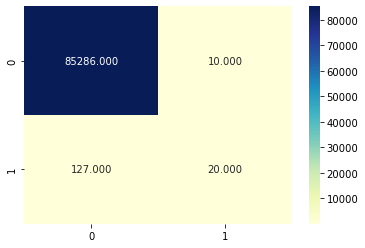

In [83]:
labels= [0,1]
sns.heatmap(cnf_matrix, annot = True,cmap= 'YlGnBu',fmt = ".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [84]:
y_pred = random_forest.predict(x_pca)

In [85]:
cnf_matrix = confusion_matrix(y,y_pred.round())

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.97      0.74      0.84       492

    accuracy                           1.00    284807
   macro avg       0.99      0.87      0.92    284807
weighted avg       1.00      1.00      1.00    284807



In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [90]:
y_pred = decision_tree.predict(x_test)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.17      0.18      0.17       147

    accuracy                           1.00     85443
   macro avg       0.59      0.59      0.59     85443
weighted avg       1.00      1.00      1.00     85443



<function matplotlib.pyplot.show(close=None, block=None)>

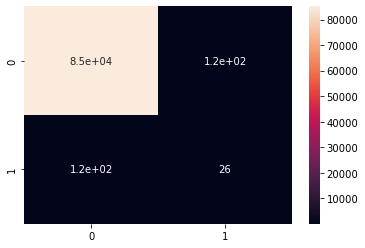

In [92]:
confusion_matrix_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_2, annot = True)
plt.show

In [93]:
decision_tree.score(x_test,y_test)

0.9971208876092834

In [94]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=2)

In [96]:
pca.fit(df)

PCA(n_components=2)

In [97]:
x_pca = pca.transform(df)

In [98]:
df.shape

(284807, 30)

In [99]:
x_pca.shape

(284807, 2)

In [100]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedamount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


In [101]:
x_pca

array([[ 1.32225953, -0.38907091],
       [-1.26964458, -0.07892483],
       [ 1.83446538,  1.34162336],
       ...,
       [-1.75637739,  0.93481061],
       [ 0.05689228, -0.68841445],
       [ 0.68637613,  0.2752852 ]])

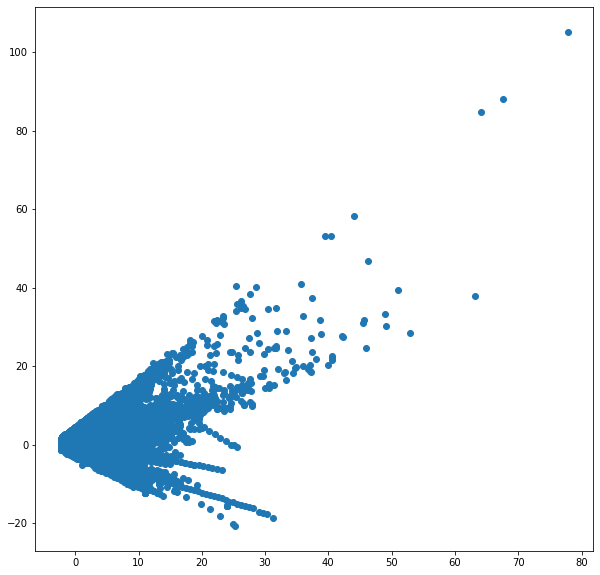

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1])